# Gesture Detection Model

## 1 Engineer features

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'C:\\Users\\Christian\\git\\drone_steering\\models'

In [3]:
os.chdir('..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer, DataResampler

### 1.2  Load data

In [5]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01.csv
1,features_flip_c_02_120.csv,labels_flip_c_02.csv
2,features_flip_c_03_120.csv,labels_flip_c_03.csv
3,features_flip_l_01_120.csv,labels_flip_l_01.csv
4,features_flip_l_02_120.csv,labels_flip_l_02.csv
5,features_flip_l_03_120.csv,labels_flip_l_03.csv
6,features_flip_p_01_120.csv,labels_flip_p_01.csv
7,features_land_c_01_120.csv,labels_land_c_01.csv
8,features_land_c_02_120.csv,labels_land_c_02.csv
9,features_land_c_03_120.csv,labels_land_c_03.csv


In [6]:
de.load_data()
de.assemble_data(max_error=500, tolerance_range= 600)

In [7]:
de.display_information()

i: 0 	shape X: (603, 18, 16) 	shape y: (603,) 	count: 49
i: 1 	shape X: (519, 18, 16) 	shape y: (519,) 	count: 37
i: 2 	shape X: (498, 18, 16) 	shape y: (498,) 	count: 59
i: 3 	shape X: (650, 18, 16) 	shape y: (650,) 	count: 138
i: 4 	shape X: (508, 18, 16) 	shape y: (508,) 	count: 95
i: 5 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 90
i: 6 	shape X: (601, 18, 16) 	shape y: (601,) 	count: 107
i: 7 	shape X: (440, 18, 16) 	shape y: (440,) 	count: 83
i: 8 	shape X: (490, 18, 16) 	shape y: (490,) 	count: 70
i: 9 	shape X: (476, 18, 16) 	shape y: (476,) 	count: 74
i: 10 	shape X: (492, 18, 16) 	shape y: (492,) 	count: 85
i: 11 	shape X: (436, 18, 16) 	shape y: (436,) 	count: 59
i: 12 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 86
i: 13 	shape X: (551, 18, 16) 	shape y: (551,) 	count: 127
i: 14 	shape X: (550, 18, 16) 	shape y: (550,) 	count: 114
i: 15 	shape X: (549, 18, 16) 	shape y: (549,) 	count: 115
i: 16 	shape X: (541, 18, 16) 	shape y: (541,) 	count: 92
i: 17 	shape X: (53

In [8]:
dr = DataResampler()
dr.fit(de.X, de.y)
dr.restrict_zero_labels(500)
dr.display_information()

-------------------------------------
Current number of zero-labels: 14998
New number of zero-labels: 500


,abs_orig,pct_orig,abs_current,pct_current
0,14998,82.46,500,13.55
1,453,2.49,453,12.28
2,368,2.02,368,9.97
3,575,3.16,575,15.58
4,677,3.72,677,18.35
5,660,3.63,660,17.89
6,457,2.51,457,12.38


In [9]:
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(dr.X)
y = to_categorical(dr.y)

## 2 Train model

### 2.1  Split in train / test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 2.2 Define and compile model

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [12]:
n_timesteps = X.shape[1] # here 18
n_features = X.shape[2] # here 16
n_outputs =  y.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2.3 Fit and validate model

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
2952/2952 [==============================] - 5s 2ms/step - loss: 0.6675 - acc: 0.7656
Epoch 2/100
2952/2952 [==============================] - 3s 1ms/step - loss: 0.2075 - acc: 0.9414
Epoch 3/100
2952/2952 [==============================] - 4s 1ms/step - loss: 0.1808 - acc: 0.9482A: 0s - loss: 0.1830 - acc: 0.94
Epoch 4/100
2952/2952 [==============================] - 4s 1ms/step - loss: 0.1697 - acc: 0.9488
Epoch 5/100
2952/2952 [==============================] - 4s 1ms/step - loss: 0.1539 - acc: 0.9546
Epoch 6/100
2952/2952 [==============================] - 4s 1ms/step - loss: 0.1479 - acc: 0.9553
Epoch 7/100
2952/2952 [==============================] - 3s 1ms/step - loss: 0.1442 - acc: 0.9563
Epoch 8/100
2952/2952 [==============================] - 3s 1ms/step - loss: 0.1305 - acc: 0.9583
Epoch 9/100
2952/2952 [==============================] - 3s 1ms/step - loss: 0.1283 - acc: 0.9597
Epoch 10/100
2952/2952 [==============================] - 3s 1ms/step - loss: 0.1347 -

2952/2952 [==============================] - 9s 3ms/step - loss: 0.0552 - acc: 0.9807
Epoch 82/100
2952/2952 [==============================] - 8s 3ms/step - loss: 0.0607 - acc: 0.9787
Epoch 83/100
2952/2952 [==============================] - 8s 3ms/step - loss: 0.0649 - acc: 0.9783
Epoch 84/100
2952/2952 [==============================] - 10s 3ms/step - loss: 0.0570 - acc: 0.9814
Epoch 85/100
2952/2952 [==============================] - 9s 3ms/step - loss: 0.0644 - acc: 0.9776
Epoch 86/100
2952/2952 [==============================] - 7s 2ms/step - loss: 0.0494 - acc: 0.9834
Epoch 87/100
2952/2952 [==============================] - 9s 3ms/step - loss: 0.0519 - acc: 0.9831
Epoch 88/100
2952/2952 [==============================] - 6s 2ms/step - loss: 0.0571 - acc: 0.9804
Epoch 89/100
2952/2952 [==============================] - 8s 3ms/step - loss: 0.0523 - acc: 0.9817
Epoch 90/100
2952/2952 [==============================] - 7s 2ms/step - loss: 0.0611 - acc: 0.9770
Epoch 91/100
2952/2952

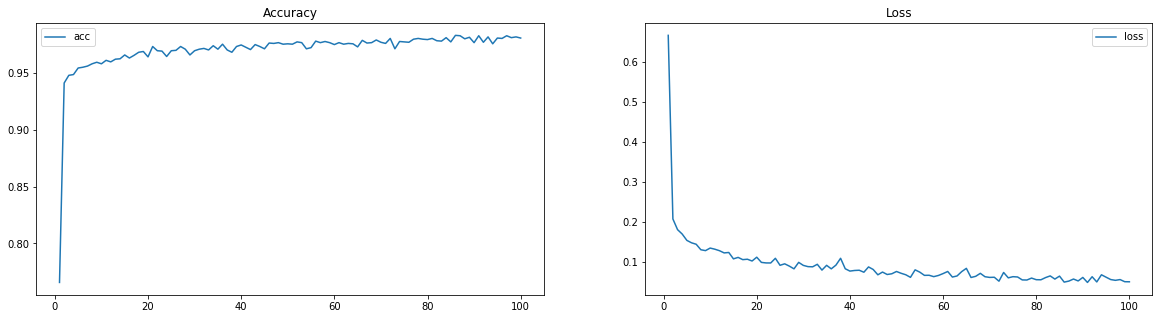

In [14]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [15]:
eval_results = np.round(model.evaluate(X_test, y_test, batch_size=16, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

738/738 [==============================] - 1s 1ms/step
Loss:     0.1
Accuracy: 0.98


In [16]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 26 	Pred: 3 	Actual: 0 	Probability: 1.0
Index: 59 	Pred: 0 	Actual: 6 	Probability: 0.69
Index: 68 	Pred: 6 	Actual: 0 	Probability: 0.94
Index: 205 	Pred: 0 	Actual: 5 	Probability: 0.65
Index: 245 	Pred: 5 	Actual: 0 	Probability: 1.0
Index: 301 	Pred: 4 	Actual: 0 	Probability: 1.0
Index: 345 	Pred: 3 	Actual: 0 	Probability: 0.84
Index: 409 	Pred: 0 	Actual: 1 	Probability: 0.51
Index: 467 	Pred: 6 	Actual: 0 	Probability: 0.98
Index: 482 	Pred: 0 	Actual: 3 	Probability: 0.75
Index: 489 	Pred: 3 	Actual: 0 	Probability: 1.0
Index: 492 	Pred: 1 	Actual: 0 	Probability: 0.99
Index: 552 	Pred: 3 	Actual: 0 	Probability: 1.0
Index: 603 	Pred: 0 	Actual: 1 	Probability: 0.86
Index: 633 	Pred: 0 	Actual: 3 	Probability: 0.51
Index: 700 	Pred: 5 	Actual: 0 	Probability: 0.8


In [17]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 1 	Pred: 5 	Actual: 5 	Probability: 0.99
Index: 2 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 3 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 4 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 5 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 6 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 7 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 8 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 9 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 10 	Pred: 5 	Actual: 5 	Probability: 0.86
Index: 11 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 12 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 13 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 14 	Pred: 0 	Actual: 0 	Probability: 0.63
Index: 15 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 16 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 17 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 18 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 19 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 20 	Pred: 6 	Actual: 6 	Probability: 1.

Index: 176 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 177 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 178 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 179 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 180 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 181 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 182 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 183 	Pred: 5 	Actual: 5 	Probability: 0.97
Index: 184 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 185 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 186 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 187 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 188 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 189 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 190 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 191 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 192 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 193 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 194 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 195 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 196 	Pred: 

Index: 349 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 350 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 351 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 352 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 353 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 354 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 355 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 356 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 357 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 358 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 359 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 360 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 361 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 362 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 363 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 364 	Pred: 1 	Actual: 1 	Probability: 0.65
Index: 365 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 366 	Pred: 4 	Actual: 4 	Probability: 0.88
Index: 367 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 368 	Pred: 5 	Actual: 5 	Probability: 0.94
Index: 369 	Pred

Index: 522 	Pred: 1 	Actual: 1 	Probability: 0.97
Index: 523 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 524 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 525 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 526 	Pred: 6 	Actual: 6 	Probability: 0.96
Index: 527 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 528 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 529 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 530 	Pred: 6 	Actual: 6 	Probability: 0.99
Index: 531 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 532 	Pred: 4 	Actual: 4 	Probability: 0.94
Index: 533 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 534 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 535 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 536 	Pred: 1 	Actual: 1 	Probability: 0.94
Index: 537 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 538 	Pred: 2 	Actual: 2 	Probability: 1.0
Index: 539 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 540 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 541 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 542 	P

Index: 699 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 701 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 702 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 703 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 704 	Pred: 5 	Actual: 5 	Probability: 1.0
Index: 705 	Pred: 3 	Actual: 3 	Probability: 0.95
Index: 706 	Pred: 4 	Actual: 4 	Probability: 1.0
Index: 707 	Pred: 6 	Actual: 6 	Probability: 0.97
Index: 708 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 709 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 710 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 711 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 712 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 713 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 714 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 715 	Pred: 5 	Actual: 5 	Probability: 0.98
Index: 716 	Pred: 5 	Actual: 5 	Probability: 0.93
Index: 717 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 718 	Pred: 6 	Actual: 6 	Probability: 1.0
Index: 719 	Pred: 1 	Actual: 1 	Probability: 1.0
Index: 720 	Pre

### 2.4 Save model

In [18]:
from keras.models import load_model
import h5py
model.save('models/model_gesture.h5')